In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Bibliotecas
# Tratamento e análise
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleção
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos de Regressão
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelos de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Métricas dos nossos modelos
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Pipeline
from sklearn.pipeline import make_pipeline

# Modelos de Regressão

## Regressão Linear


### Informações Iniciais

In [ ]:
# Importa a base de dados tratada
# Os outliers dessa base já foram retirados
df_imoveis_final = pd.read_csv('/content/drive/MyDrive/bases de dados/Imóveis/df_vendas_final.csv')
df_imoveis_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6286 entries, 0 to 6285
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bathrooms                      6286 non-null   int64
 1   parkingSpaces                  6286 non-null   int64
 2   suites                         6286 non-null   int64
 3   monthlyCondoFee                6286 non-null   int64
 4   usableAreas                    6286 non-null   int64
 5   bedrooms                       6286 non-null   int64
 6   backyard                       6286 non-null   int64
 7   barbgrill                      6286 non-null   int64
 8   bathtub                        6286 non-null   int64
 9   fireplace                      6286 non-null   int64
 10  furnished                      6286 non-null   int64
 11  garden                         6286 non-null   int64
 12  guestpark                      6286 non-null   int64
 13  gym               

### Analisando as Correlações

In [ ]:
# Busca as melhores correlações entre as features
corr_new = df_imoveis_final.corr()

corr_new['salePrice'].sort_values(ascending=False)

salePrice                        1.000000
parkingSpaces                    0.409356
suites                           0.401478
bathrooms                        0.386125
address.region_Sudeste           0.307067
imvl_type_cobertura              0.222972
bedrooms                         0.217351
imvl_type_casas-de-condominio    0.212938
imvl_type_flat                   0.099544
imvl_type_quitinetes             0.060394
imvl_type_casas                  0.053564
address.region_Nordeste          0.045884
imvl_type_casas-de-vila          0.039948
usableAreas                      0.016766
imvl_type_studio                 0.008938
monthlyCondoFee                  0.006125
address.region_Norte            -0.096294
address.region_Centro-Oeste     -0.106732
barbgrill                       -0.117196
address.region_Sul              -0.136951
pool                            -0.200709
backyard                        -0.238479
partyhall                       -0.269958
playground                      -0

### Escolhendo as Features

In [ ]:
# Seleciona as features
features = ['bathrooms', 'parkingSpaces', 'suites','bedrooms', 'sauna',  'playground',
           'backyard', 'bathtub', 'fireplace', 'garden', 'backyard',
           'furnished', 'guestpark', 'gym', 'hottub', 'sportcourt', 'partyhall',
           'tenniscourt', 'imvl_type_apartamentos']

X = df_imoveis_final[features]
y = df_imoveis_final['salePrice']

In [ ]:
# Encontra melhores resultados com features não-lineares
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

### Treinando o Modelo

In [ ]:
# Treina o modelo de Regressão Linear
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

# Visualiza a predição dos dados de treino
some_data = X_train.iloc[:5]
some_labels = y_train[:5]

print('Predicitons:', lin_reg.predict(some_data))
print('Labels:', list(some_labels))

Predicitons: [421477.73690072 806156.23690072 566408.17440072 755252.23690072
 652186.23690072]
Labels: [495000, 990000, 340000, 788000, 724999]


### Testando o Modelo

In [ ]:
# Avaliação do modelo com os dados de teste
lin_reg.fit(X_test, y_test)

sales_predictions = lin_reg.predict(X_test)

In [ ]:
# Avalia os scores calculando o MSE e o R²
lin_r2 = r2_score(y_test, sales_predictions)
print('R²: ', lin_r2)

lin_mse = mean_squared_error(y_test, sales_predictions)
print('MSE: ', lin_mse)

R²:  0.4646417153409903
MSE:  22706136638.167652


In [ ]:
# Tenta encontrar as melhores métricas do R² com o GridSearchCV
param_grid = {'fit_intercept': [True],
              'copy_X': [True],
              'n_jobs': [None],
              'positive': [False]}


grid_search_1 = GridSearchCV(lin_reg, param_grid, cv=1000,
                           scoring='r2',
                           return_train_score=True)

grid_search_1.fit(X_train, y_train)

In [ ]:
print(" Resultados do Grid Search para o R²" )
print("\n O melhor modelo após testar TODOS os parâmetros:\n",grid_search_1.best_estimator_)
print("\n A melhor métrica após testar TODOS os parâmetros:\n",grid_search_1.best_score_)
print("\n Os melhores parâmetros após testar TODOS os parâmetros:\n",grid_search_1.best_params_)

 Resultados do Grid Search para o R²

 O melhor modelo após testar TODOS os parâmetros:
 LinearRegression()

 A melhor métrica após testar TODOS os parâmetros:
 -7.606967402535444e+17

 Os melhores parâmetros após testar TODOS os parâmetros:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
# Tenta encontrar as melhores métricas MSE com o GridSearchCV
param_grid = {'fit_intercept': [True],
              'copy_X': [True],
              'n_jobs': [None],
              'positive': [False]}


grid_search_2 = GridSearchCV(lin_reg, param_grid, cv=1000,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search_2.fit(X_train, y_train)

In [ ]:
print(" Resultados do Grid Search para o MSE" )
print("\n O melhor modelo após testar TODOS os parâmetros:\n",grid_search_2.best_estimator_)
print("\n A melhor métrica após testar TODOS os parâmetros:\n",grid_search_2.best_score_)
print("\n Os melhores parâmetros após testar TODOS os parâmetros:\n",grid_search_2.best_params_)

 Resultados do Grid Search para o MSE

 O melhor modelo após testar TODOS os parâmetros:
 LinearRegression()

 A melhor métrica após testar TODOS os parâmetros:
 -4.572069015979189e+28

 Os melhores parâmetros após testar TODOS os parâmetros:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### Conclusão da Regressão Linear
- A regressão linear não obteve resultados satisfatórios, acreditamos que isso se deu pela baixa correlação da coluna 'salePrice', que seria o preço de venda dos imóveis, com as outra features.  

- Além disso, apesar de termos tratado os outliers da coluna 'salePrice', outros outliers permaneceram nas outras features do dataframe e não foi possível retirá-los também pois o dataframe reduziu drasticamente.


- Tentamos refazer as features várias vezes e tratar os dados de diversas formas diferentes, assim como aplicar o GridSearchCV no modelo, mas esse foi o melhor resultado que conseguimos obter.

## Regressão Logística

In [ ]:
# Trazendo os dados
df_vendas_final = pd.read_csv('/content/drive/MyDrive/bases-trabalho-ciencia-dados/trabalho-1/df_vendas_final.csv', encoding='utf-8')
df_vendas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bathrooms                      12781 non-null  int64
 1   parkingSpaces                  12781 non-null  int64
 2   suites                         12781 non-null  int64
 3   monthlyCondoFee                12781 non-null  int64
 4   usableAreas                    12781 non-null  int64
 5   bedrooms                       12781 non-null  int64
 6   backyard                       12781 non-null  int64
 7   barbgrill                      12781 non-null  int64
 8   bathtub                        12781 non-null  int64
 9   fireplace                      12781 non-null  int64
 10  furnished                      12781 non-null  int64
 11  garden                         12781 non-null  int64
 12  guestpark                      12781 non-null  int64
 13  gym             

- Olhando as correlações para salePrice

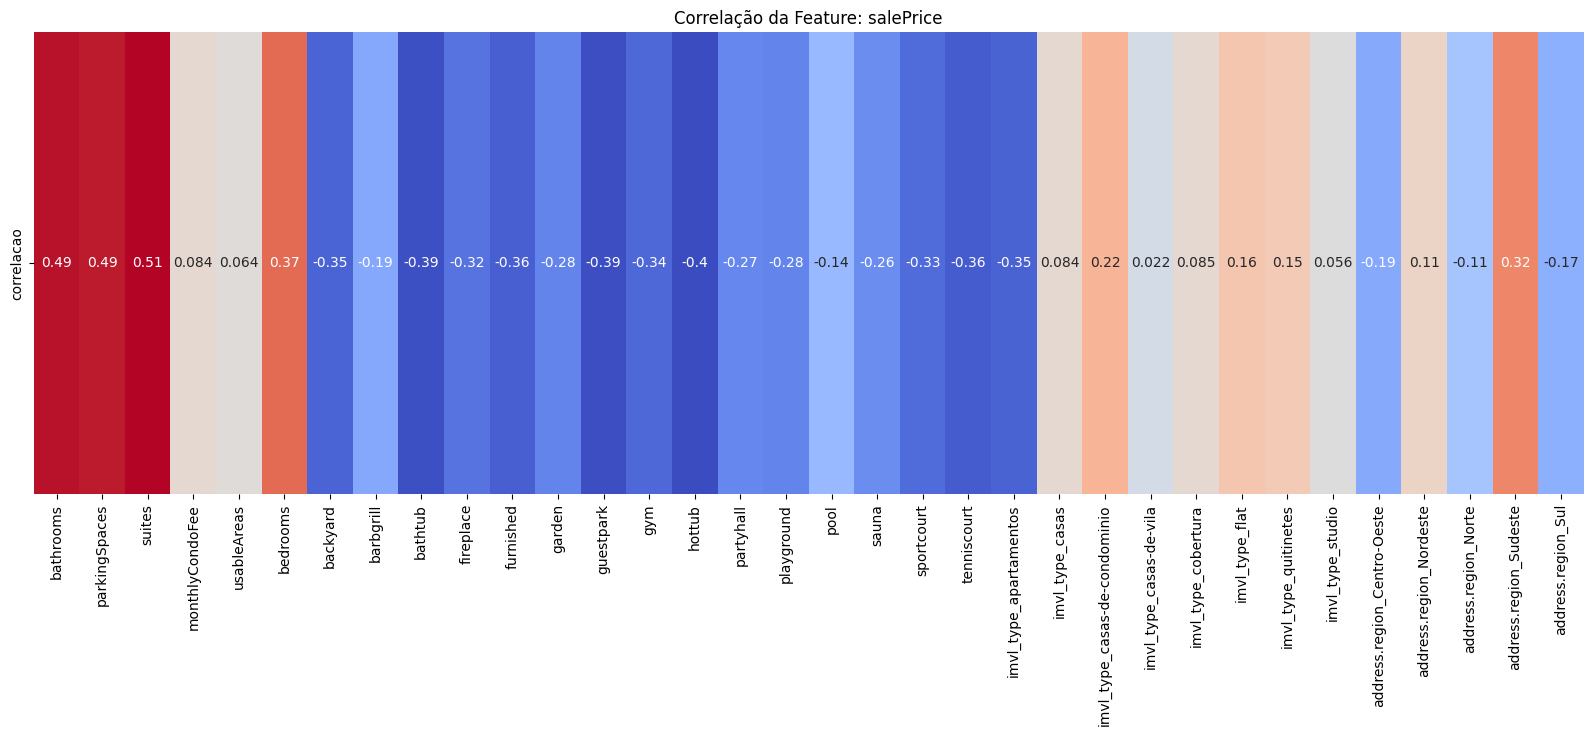

In [ ]:
feature = 'salePrice'

# Selecionar as outras variáveis (exceto a feature desejada)
outras_variaveis = df_vendas_final.drop(feature, axis=1)

# Calcular a matriz de correlação entre a feature selecionada e as outras variáveis
correlation_matrix = df_vendas_final[outras_variaveis.columns].corrwith(df_vendas_final[feature])

# Criar o dataframe da matriz de correlação
df_correlation = pd.DataFrame(correlation_matrix, columns=['correlacao'])

# Criar o heatmap com Seaborn
plt.figure(figsize=(20, 6))  # Ajustar o tamanho da figura conforme necessário
sns.heatmap(df_correlation.transpose(), annot=True, cmap='coolwarm', cbar=False)

# Exibir o gráfico
plt.title(f'Correlação da Feature: {feature}')
plt.show()


- Com base nas correlações entre as features e o salePrice, foram retiradas as que possuiam uma baixa correlação:

In [ ]:
# Dropar colunas com baixa correlação
df_vendas_final.drop(['monthlyCondoFee', 'usableAreas', 'barbgrill','pool'], axis=1, inplace=True)
df_vendas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bathrooms                      12781 non-null  int64
 1   parkingSpaces                  12781 non-null  int64
 2   suites                         12781 non-null  int64
 3   bedrooms                       12781 non-null  int64
 4   backyard                       12781 non-null  int64
 5   bathtub                        12781 non-null  int64
 6   fireplace                      12781 non-null  int64
 7   furnished                      12781 non-null  int64
 8   garden                         12781 non-null  int64
 9   guestpark                      12781 non-null  int64
 10  gym                            12781 non-null  int64
 11  hottub                         12781 non-null  int64
 12  partyhall                      12781 non-null  int64
 13  playground      

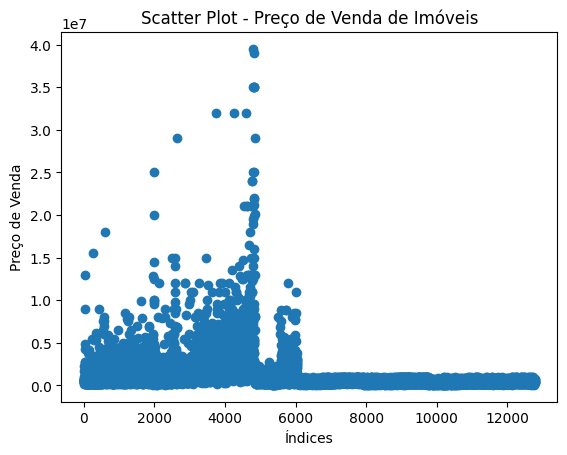

In [ ]:
# Extrair os valores da coluna "PrecoVenda"
preco_venda = df_vendas_final['salePrice']

# Criar um array de índices para os pontos
indices = range(len(preco_venda))

# Criar o scatter plot
plt.scatter(indices, preco_venda)

# Adicionar rótulos e título
plt.xlabel('Índices')
plt.ylabel('Preço de Venda')
plt.title('Scatter Plot - Preço de Venda de Imóveis')

# Exibir o gráfico
plt.show()

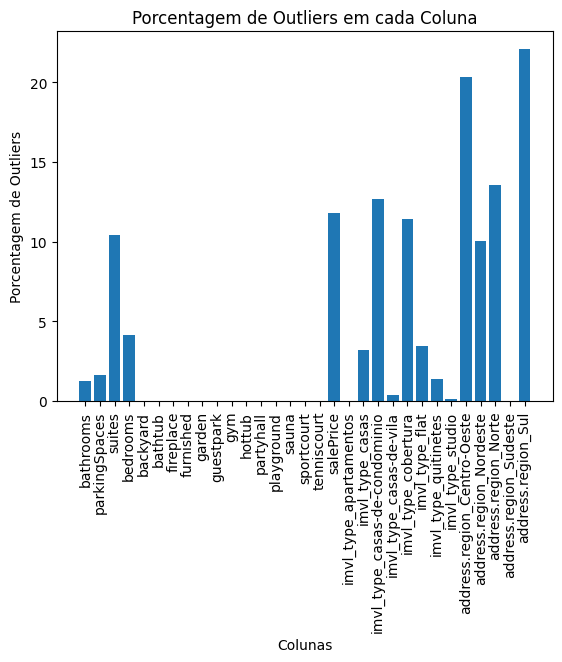

In [ ]:
# Função para calcular a porcentagem de outliers em cada coluna
def calculate_outlier_percentage(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calcula a porcentagem de outliers
    total_outliers = len(col[(col < lower_bound) | (col > upper_bound)])
    total_values = len(col)
    percentage = (total_outliers / total_values) * 100
    return percentage

# Lista para armazenar as porcentagens de outliers em cada coluna
outlier_percentages = []

# Loop para calcular as porcentagens de outliers em todas as colunas
for col in df_vendas_final.columns:
    percentage = calculate_outlier_percentage(df_vendas_final[col])
    outlier_percentages.append(percentage)

# Gráfico de barras para exibir as porcentagens de outliers em cada coluna
plt.bar(df_vendas_final.columns, outlier_percentages)
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Outliers')
plt.title('Porcentagem de Outliers em cada Coluna')
plt.xticks(rotation=90)
plt.show()


- Os gráficos mostram que existem muitos outliers em algumas features
- Será feita a retirada de outliers para melhorar esses aspectos e possibilitar um treinamento melhor do modelo

In [ ]:
# Função para tratar os outliers
def cal_outliers(col):
    # calcula os limites para identificar outliers
    q1 = df_vendas_final[col].quantile(0.25)
    q3 = df_vendas_final[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # seleciona os outliers
    outliers = df_vendas_final[(df_vendas_final[col] < lower_bound) | (df_vendas_final[col] > upper_bound)]

    # trata os outliers
    df_vendas_final[col] = df_vendas_final[col].clip(lower_bound, upper_bound)


In [ ]:
# Lista das colunas a serem tratadas
columns_to_treat = ['suites','bedrooms','salePrice','imvl_type_casas-de-condominio','imvl_type_cobertura','address.region_Centro-Oeste',
                    'address.region_Nordeste','address.region_Norte','address.region_Sul']
# Loop for each para tratar os outliers em cada coluna
for col in columns_to_treat:
    cal_outliers(col)
print('Tratamento de outliers finalizado')

Tratamento de outliers finalizado


In [ ]:
# Transformando em int as features que viraram float após o tratamento para conseguir fazer a regressão logística sem erros
df_vendas_final['suites'] = df_vendas_final['suites'].astype(int)
df_vendas_final['bedrooms'] = df_vendas_final['bedrooms'].astype(int)
df_vendas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bathrooms                      12781 non-null  int64
 1   parkingSpaces                  12781 non-null  int64
 2   suites                         12781 non-null  int64
 3   bedrooms                       12781 non-null  int64
 4   backyard                       12781 non-null  int64
 5   bathtub                        12781 non-null  int64
 6   fireplace                      12781 non-null  int64
 7   furnished                      12781 non-null  int64
 8   garden                         12781 non-null  int64
 9   guestpark                      12781 non-null  int64
 10  gym                            12781 non-null  int64
 11  hottub                         12781 non-null  int64
 12  partyhall                      12781 non-null  int64
 13  playground      

In [ ]:
# Separar o dataset em: treino (80%) / teste 20% / validação (10%)

X = df_vendas_final.drop(['salePrice'], axis=1)
y = df_vendas_final['salePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Treinando o modelo passando as features de forma direta

In [ ]:
# Regressão Logística
clf = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300).fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
# Model Evaluation metrics

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, pos_label='positive', average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, pos_label='positive', average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, pos_label='positive', average='micro')))

# #Logistic Regression Classifier Confusion matrix
# from sklearn.metrics import confusion_matrix
# print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# Calcular o MSE
mse = mean_squared_error(y_test,y_pred)
print("MSE:", mse)
# Calcular o R²
r2 = r2_score(y_test,y_pred)
print("R²:", r2)


Accuracy Score : 0.1367334167709637
Precision Score : 0.1367334167709637
Recall Score : 0.1367334167709637
F1 Score : 0.1367334167709637
MSE: 364029652593.42084
R²: 0.4062910257431863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


- Os resultados treinando diretamente não se mostraram muito bons, possivelmente por modelos de regressão logística funcionarem melhor com classes bem definidas

- Treinando o modelo passando as features com pipeline para normalizar novamente os dados

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300))
pipe.fit(X_train, y_train)  # apply scaling on training data

y_pred = pipe.predict(X_test)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
score = pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
print(f'Score: {score}')

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, pos_label='positive', average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, pos_label='positive', average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, pos_label='positive', average='micro')))

In [ ]:

print("MSE:", mse)
print("R²:", r2)
score = pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
print(f'Score: {score}')

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, pos_label='positive', average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, pos_label='positive', average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, pos_label='positive', average='micro')))

MSE: 341788496448.7372
R²: 0.4425649224075715
Score: 0.13704630788485608
Accuracy Score : 0.13704630788485608
Precision Score : 0.13704630788485608
Recall Score : 0.13704630788485608
F1 Score : 0.13704630788485608


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


- O treinamento com pipeline normalizando funcionou melhor, possivelmente devido a melhor definição de classes após a normalização

## Regressão K-vizinhos

### Informações Primárias do Dataset

In [ ]:
df_imoveis = pd.read_csv("/content/drive/MyDrive/Dados/df_vendas_final.csv")
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bathrooms                      12781 non-null  int64
 1   parkingSpaces                  12781 non-null  int64
 2   suites                         12781 non-null  int64
 3   monthlyCondoFee                12781 non-null  int64
 4   usableAreas                    12781 non-null  int64
 5   bedrooms                       12781 non-null  int64
 6   backyard                       12781 non-null  int64
 7   barbgrill                      12781 non-null  int64
 8   bathtub                        12781 non-null  int64
 9   fireplace                      12781 non-null  int64
 10  furnished                      12781 non-null  int64
 11  garden                         12781 non-null  int64
 12  guestpark                      12781 non-null  int64
 13  gym             

### Distribuição dos Dados

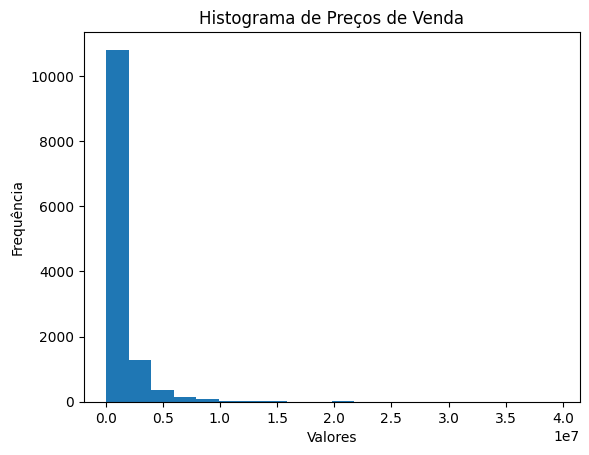

In [ ]:
#Histograma dos preços de venda
plt.hist(df_imoveis['salePrice'], bins=20)
plt.title('Histograma de Preços de Venda')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

*Com base no gráfico acima, percebemos que a escala dos preços de vendas tem uma distância muito grande entre o maior e o menor valor, apresentando muitos outiliers*

### Melhorando a Distribuição

In [ ]:
#Fazendo uma transformação para escala logarítimica
coluna_antiga = df_imoveis['salePrice'].to_numpy()
coluna_nova = np.log(coluna_antiga)
df_imoveis['salePrice'] = df_imoveis['salePrice'].replace(coluna_antiga, coluna_nova)

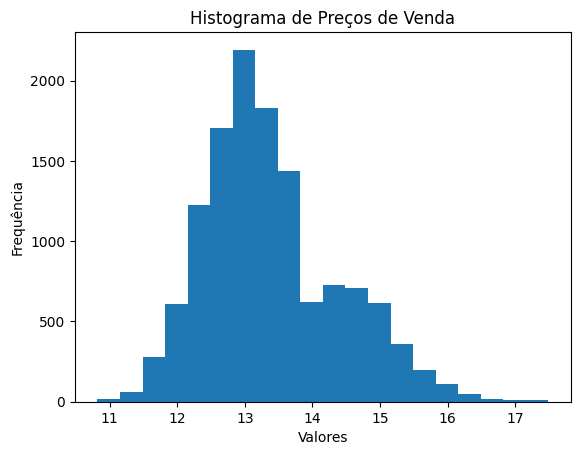

In [ ]:
#Histograma dos preços de venda após transformação
plt.hist(df_imoveis['salePrice'], bins=20)
plt.title('Histograma de Preços de Venda')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

*Com a mundança de escala, percebemos que a distribuição dos dados toma uma forma melhor, ficando mais próxima da normal, inclusive*

### Tratamento de Outliers

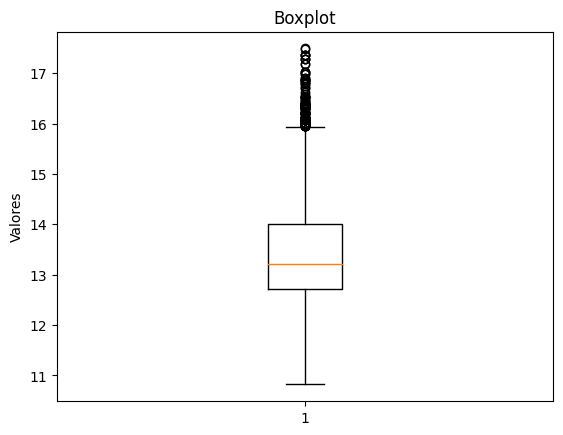

In [ ]:
# Boxplot dos preços de venda pós transformação
plt.boxplot(df_imoveis['salePrice'])
plt.title('Boxplot')
plt.ylabel('Valores')
plt.show()

*Através do gráfico acima, verifcamos que existem alguns outiliers. Vamos quatinficá-los*

In [ ]:
#Calculando os primeiro e terceiro quartil
Pquart = np.quantile(df_imoveis['salePrice'], 0.25)
Tquart = np.quantile(df_imoveis['salePrice'], 0.75)

#Definindo os limite superior e calculando o número de outliers
limite_superior = Tquart + 1.5*(Tquart - Pquart)
len(df_imoveis[df_imoveis['salePrice'] > limite_superior])

156

*Uma quantidade considerável. Diante disso, vamos remover esses dados, pois o knn é sensível a esses valores.*

In [ ]:
df_imoveis_final = df_imoveis[df_imoveis['salePrice'] <= limite_superior]

*Verificando o resultado final*

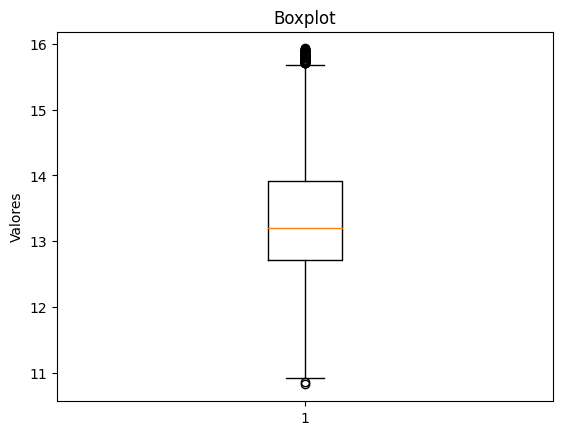

In [ ]:
# Boxplot dos preços de venda pós remoção de outiliers
plt.boxplot(df_imoveis_final['salePrice'])
plt.title('Boxplot')
plt.ylabel('Valores')
plt.show()

*Reduzimos de forma considerável o número de outiliers, como esperado*

### Verificando Correlações

In [ ]:
#Obtendo as features de maior correlação
corr_matrix = df_imoveis_final.corr()
corr_matrix = corr_matrix['salePrice'].sort_values(ascending=False)
model_features = [x for x in corr_matrix.keys() if abs(corr_matrix[x]) >= 0.5 and abs(corr_matrix[x])!= 1]
model_features

['bathrooms',
 'suites',
 'parkingSpaces',
 'bedrooms',
 'address.region_Sudeste',
 'gym',
 'furnished',
 'tenniscourt',
 'bathtub',
 'guestpark',
 'hottub',
 'imvl_type_apartamentos']

### Normalizando os Dados

In [ ]:
#Normalizando os dados com MinMax
scaler = MinMaxScaler()
colunas = df_imoveis_final.columns
d = scaler.fit_transform(df_imoveis_final)
df_imoveis_normalized = pd.DataFrame(d, columns = colunas)
df_imoveis_normalized['salePrice']

0        0.429383
1        0.486094
2        0.687507
3        0.583065
4        0.479462
           ...   
12620    0.365890
12621    0.495638
12622    0.391527
12623    0.380656
12624    0.482255
Name: salePrice, Length: 12625, dtype: float64

### Treinando o Modelo

In [ ]:
#Separando os dados em treinamento e teste
X = df_imoveis_normalized[model_features]
y = df_imoveis_normalized['salePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Procurando o melhor k via grid search
k_values = range(1, 21)
param_grid = {'n_neighbors': k_values}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)
k = grid_search.best_params_['n_neighbors']

#Treinando o modelo com o melhor k obtido
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19)

### Testando o Modelo

In [ ]:
y_pred = knn.predict(X_test)

#Erro quadrático médio
mse = mean_squared_error(y_test, y_pred)

#Coeficiente de Determinação
r2 = r2_score(y_test, y_pred)

for metrica in [mse]:
  normalized = [[0]*21 + [metrica] + [0]*13]
  desnormalized = scaler.inverse_transform(normalized)[0][21]
  print(np.exp(desnormalized))

print(r2)

52308.704760789056
0.7440984927193164


## Bônus: Regressão Random Forest

In [ ]:
# Random Forest Modelo

# Create and train the Random Forest regression model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 25254194196.9562
R-squared (R2) Score: 0.4046


In [ ]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Criar o modelo de Random Forest
rf_model = RandomForestRegressor()

# Realizar busca em grade para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Best parameters: {best_params}")

Mean Squared Error (MSE): 25254194196.9562
R-squared (R2) Score: 0.4046
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


# Modelos de Classificação

## Classificador Árvore de Decisão e Bônus: Regressão Logística para classificação

## Classification Task
Esta seção é dedicada à tarefa de classificação dos dados obtidos em parte pelo repositório do Kaggle, parte pelo scraping feito no website "ZAP imóveis", o objetivo é classificar o preço de um imóvel. Diferentemente da tarefa de regressão onde tentamos classificar o valor do preço propriamente dito, aqui nós buscamos classificar de acordo com 3 categorias:


HIGH - Para imóveis considerados "caros" ou de alto valor.

MEDIUM - Para imóveis de valor não tão alto, valores médios.

LOW - Imóveis que possuem baixo preço

Não são especificados os limiares dessas classes, mas adianto que proponho 2 tipos

#### 1 - Classes iguais:

Nesse caso teríamos classes de tamanho igual. Dividindo os valores em

HIGH -> Valores acima do percentil 66%

MEDIUM -> Valores entre os percentis de 33% e 66%

LOW -> Valores abaixo de 33%

#### 2 - Divisão por Quartis:

Aqui dividiriamos por quartil, de forma que:

HIGH -> Valores acima do terceiro quartil

MEDIUM -> Valores entre o primeiro quartil e o terceiro quartil

LOW -> Valores abaixo do primeiro quartil

Dependendo da escolha do modo que deve ser feito, essas classes podemos ter resultados relativamente diferentes.

### Análise dos Dados
Primeiramente vamos analisar algumas características dos dados para entender melhor o que fazer com cada um deles, inicialmente começaremos dando uma olhada geral nos dados. Procurando entender rapidamente um pouco sobre o que temos em mãos. Após a análise geral, o foco será na variável alvo, ver um pouco como está a distribuição e o que podemos fazer quanto a isso.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bases de dados/Imóveis/vendas_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16792 entries, 0 to 16791
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        16792 non-null  int64 
 1   parkingSpaces    16792 non-null  int64 
 2   suites           16792 non-null  int64 
 3   monthlyCondoFee  16792 non-null  int64 
 4   usableAreas      16792 non-null  int64 
 5   bedrooms         16792 non-null  int64 
 6   backyard         16792 non-null  int64 
 7   barbgrill        16792 non-null  int64 
 8   bathtub          16792 non-null  int64 
 9   fireplace        16792 non-null  int64 
 10  furnished        16792 non-null  int64 
 11  garden           16792 non-null  int64 
 12  guestpark        16792 non-null  int64 
 13  gym              16792 non-null  int64 
 14  hottub           16792 non-null  int64 
 15  partyhall        16792 non-null  int64 
 16  playground       16792 non-null  int64 
 17  pool             16792 non-null

Primeiro passo é transformar o salePrice, nossa variável alvo em categórico, mas para isso precisamos analisar melhor sua distribuição:

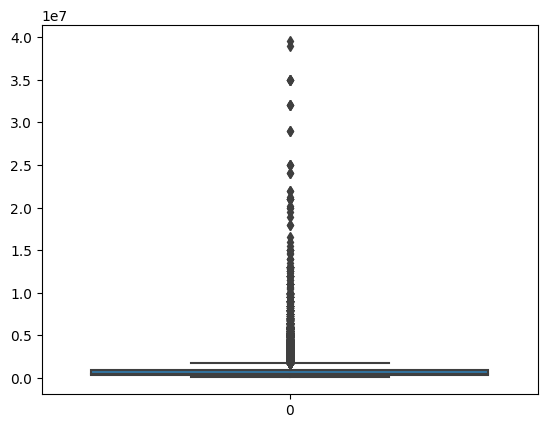

In [ ]:
prices = df['salePrice']

sns.boxplot(data = prices)

# Exibindo o gráfico
plt.show()

Olhando de forma rápida, é fácil ver que a variável alvo possui inúmeros valores outliers, que podem ser retirados para facilitar a compreensão dos dados.

No entanto como utilizamos os quartis como critério, medidas robustas, para a criação das classes, não é tão nocivo assim manter esses outliers, pois no fim tratam-se apenas da classe "HIGH". Assim, não sendo tão nocivos quanto aparentam para nosso modelo de classificação, manterei os outliers pois eles serão de certa forma, "suavizados" quando aplicarmos as transformações.

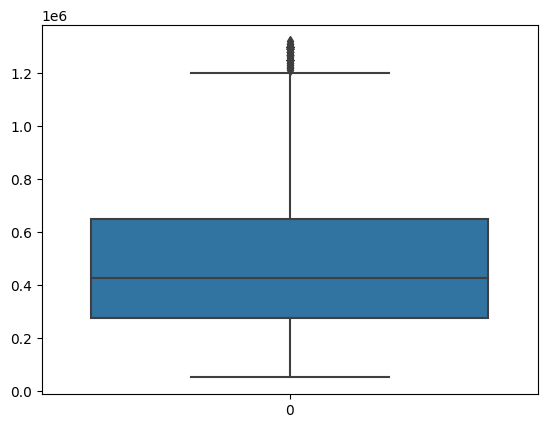

In [ ]:
limit = prices.quantile(0.75) * 1.5 # retirando outliers
prices = prices[prices < limit]
# Checar a distribuição do salePrice após retirada
sns.boxplot(data = prices)

# Exibindo o gráfico
plt.show()
# Checando o gráfico dos salePrice sem os outliers

In [ ]:
indices = prices.index

# df_no_outlier = df.iloc[indices]

df_no_outlier = df.copy()

df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16792 entries, 0 to 16791
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        16792 non-null  int64 
 1   parkingSpaces    16792 non-null  int64 
 2   suites           16792 non-null  int64 
 3   monthlyCondoFee  16792 non-null  int64 
 4   usableAreas      16792 non-null  int64 
 5   bedrooms         16792 non-null  int64 
 6   backyard         16792 non-null  int64 
 7   barbgrill        16792 non-null  int64 
 8   bathtub          16792 non-null  int64 
 9   fireplace        16792 non-null  int64 
 10  furnished        16792 non-null  int64 
 11  garden           16792 non-null  int64 
 12  guestpark        16792 non-null  int64 
 13  gym              16792 non-null  int64 
 14  hottub           16792 non-null  int64 
 15  partyhall        16792 non-null  int64 
 16  playground       16792 non-null  int64 
 17  pool             16792 non-null

Retirando os valores discrepantes perdemos uma quantidade considerável de linhas, indo de 16792 para 13129.

Decidimos manter os outliers devido a classificação, então manteremos os 16792 linhas originais.

In [ ]:
# função que vai categorizar os valores numéricos
def categorizar_por_percent(data, primeiro_percentil, segundo_percentil):
    if data > primeiro_percentil:
        return "HIGH"
    elif data <= primeiro_percentil and data > segundo_percentil:
        return "MEDIUM"
    else:
        return "LOW"

In [ ]:
df_categoric = df.copy()

# Aplicando a segunda categorização que falamos, utilizando os quartis

divisao = df['salePrice'].quantile(0.75)
divisao2 =  df['salePrice'].quantile(0.25)

df_categoric['salePrice'] = df['salePrice'].apply(categorizar_por_percent,
                                                             primeiro_percentil=divisao, segundo_percentil=divisao2)

print(df_categoric['salePrice'].value_counts()) # apenas para checar como ficou os valores
df_categoric.info()

MEDIUM    8396
HIGH      4198
LOW       4198
Name: salePrice, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16792 entries, 0 to 16791
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        16792 non-null  int64 
 1   parkingSpaces    16792 non-null  int64 
 2   suites           16792 non-null  int64 
 3   monthlyCondoFee  16792 non-null  int64 
 4   usableAreas      16792 non-null  int64 
 5   bedrooms         16792 non-null  int64 
 6   backyard         16792 non-null  int64 
 7   barbgrill        16792 non-null  int64 
 8   bathtub          16792 non-null  int64 
 9   fireplace        16792 non-null  int64 
 10  furnished        16792 non-null  int64 
 11  garden           16792 non-null  int64 
 12  guestpark        16792 non-null  int64 
 13  gym              16792 non-null  int64 
 14  hottub           16792 non-null  int64 
 15  partyhall        16792 non-null  int64 
 16  p

### Análise das Colunas de X

Aqui vamos iniciar a análise das variáveis independentes, buscando entender melhor sua distribuição e o que deve ser feito com cada uma delas.

In [ ]:
colunas_numericas = ['bathrooms', 'parkingSpaces', "suites",
                     'monthlyCondoFee', 'usableAreas', 'bedrooms']

# Primeiro capturamos os nomes das colunas que possuem valores numéricos, que não são apenas 1's e 0's

for coluna in colunas_numericas:
    print(coluna)
    print(df_categoric[coluna].value_counts().max())

# Checar se as colunas são majoritariamente dominadas por algum valor,
# caso sejam talvez não seja tão vantajoso mantê-los

bathrooms
5771
parkingSpaces
8232
suites
10283
monthlyCondoFee
4004
usableAreas
386
bedrooms
6667


In [ ]:
df_categoric = df_categoric.drop(['suites'], axis = 1)
# Dropando suites devido a pouca informação trazida pois é altamente dominada por um valor

colunas_numericas.remove("suites")
# Retirando a coluna suites dos nomes das colunas

Continuando a análise das colunas de X, aqui vamos plotar os gráficos das distribuições e um boxplot para entender um pouco sobre a possibilidade de Outliers e das medidas das colunas numéricas.

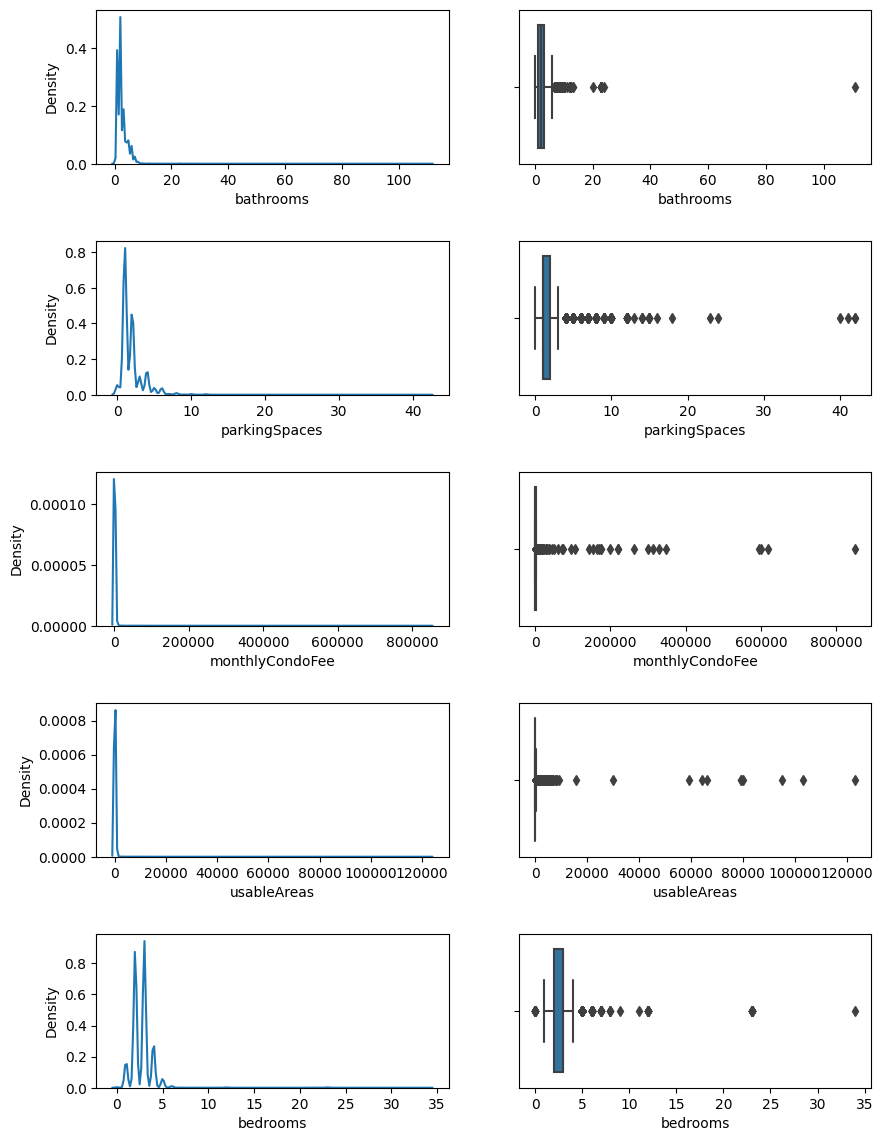

In [ ]:
fig, ax = plt.subplots(len(colunas_numericas), 2, figsize=(10, 14))

for i, coluna in enumerate(colunas_numericas):

    sns.kdeplot(data=df_categoric, x=coluna, ax = ax[i][0])
    sns.boxplot(data=df_categoric, x=coluna, ax = ax[i][1])
    sns.set_style("whitegrid")

fig.subplots_adjust(hspace = 0.5)
plt.show()

A distribuição dos dados tem cauda alongada para direita e diversos outliers superiores, como esses valores se manterão numéricas, manter esses valores pode ser muito prejudicial para nossa classificação, dessa forma, retiramos esses valores do dataset. Não há necessidade de manter e modificar os dados pode piorar ainda mais a situação então retirar pode ser a melhor opção

In [ ]:
def identificar_outliers(col):
    # Calcula os limites de outlier usando o método IQR
    Q1 = df_categoric[col].quantile(0.25)
    Q3 = df_categoric[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Retorna uma série booleana indicando se cada valor é um outlier
    return (df_categoric[col] < limite_inferior) | (df_categoric[col] > limite_superior)

In [ ]:
# filtramos os outliers das colunas de X
df_filtrado = df_categoric.copy()
for col in colunas_numericas:
    df_filtrado = df_filtrado[~identificar_outliers(col)]

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 16791
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        13611 non-null  int64 
 1   parkingSpaces    13611 non-null  int64 
 2   monthlyCondoFee  13611 non-null  int64 
 3   usableAreas      13611 non-null  int64 
 4   bedrooms         13611 non-null  int64 
 5   backyard         13611 non-null  int64 
 6   barbgrill        13611 non-null  int64 
 7   bathtub          13611 non-null  int64 
 8   fireplace        13611 non-null  int64 
 9   furnished        13611 non-null  int64 
 10  garden           13611 non-null  int64 
 11  guestpark        13611 non-null  int64 
 12  gym              13611 non-null  int64 
 13  hottub           13611 non-null  int64 
 14  partyhall        13611 non-null  int64 
 15  playground       13611 non-null  int64 
 16  pool             13611 non-null  int64 
 17  sauna            13611 non-null

<ipython-input-72-67b3caaee70e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[~identificar_outliers(col)]
<ipython-input-72-67b3caaee70e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[~identificar_outliers(col)]
<ipython-input-72-67b3caaee70e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[~identificar_outliers(col)]
<ipython-input-72-67b3caaee70e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[~identificar_outliers(col)]


Após a retirado dos outliers de todas essas colunas acabamos perdendo até que bastante linhas, mas mesmo assim temos uma quantidade de dados muito boa para treinarmos o modelo, seguimos a partir daqui com dados mais comportados e com bem menos valores discrepantes isso pode ser facilmente observado graficamente, como feito abaixo

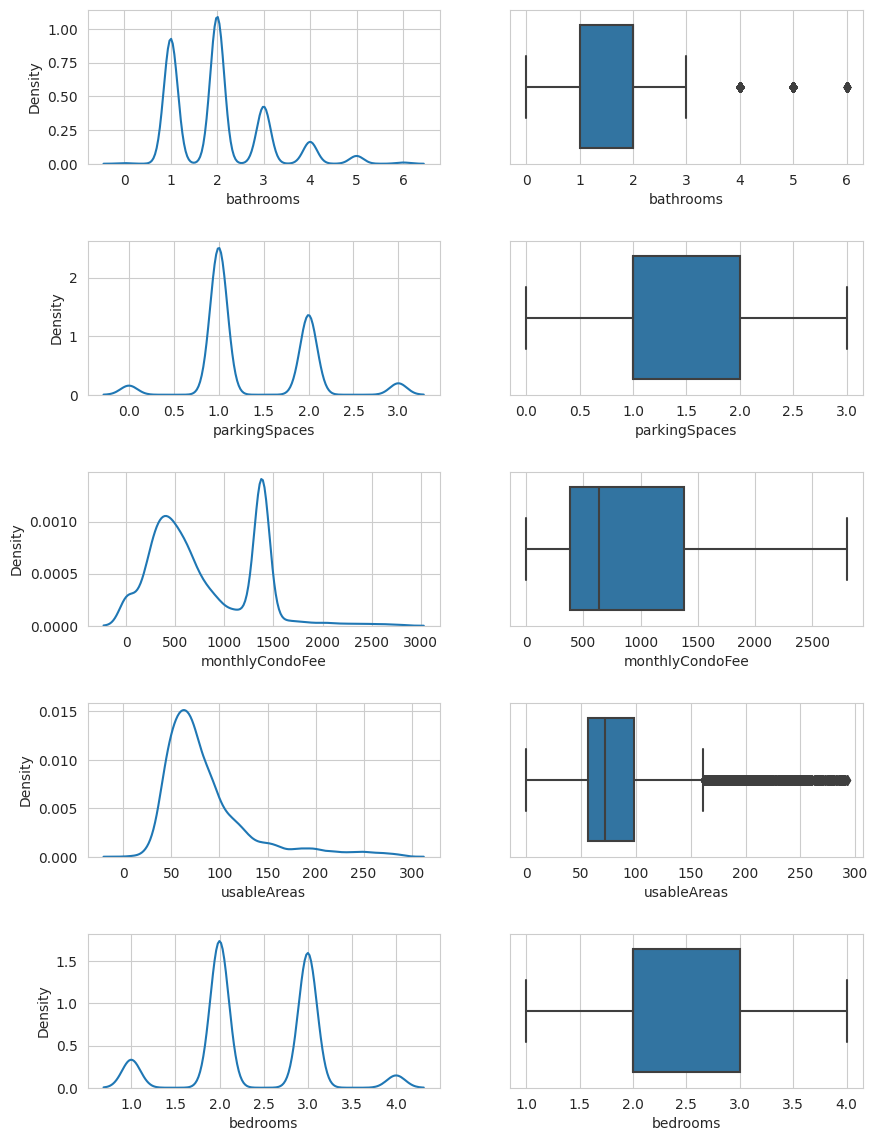

In [ ]:
# Repetindo os gráficos feitos anteriormente
fig, ax = plt.subplots(len(colunas_numericas), 2, figsize=(10, 14))

for i, coluna in enumerate(colunas_numericas):

    sns.kdeplot(data=df_filtrado, x=coluna, ax = ax[i][0])
    sns.boxplot(data=df_filtrado, x=coluna, ax = ax[i][1])
    sns.set_style("whitegrid")

fig.subplots_adjust(hspace = 0.5)
plt.show()

Agora faremos uma melhor análise das variáveis categórias que possuimos, seja elas binárias ou multicategóricas.

In [ ]:
colunas_categoricas_bool = \
                      ['backyard', 'barbgrill', 'bathtub',
                       'fireplace', 'furnished', 'garden',
                       'guestpark', 'gym', 'hottub',
                       'partyhall', 'playground', 'pool',
                       'sauna', 'sportcourt', 'tenniscourt']

colunas_multcategoricas = ['imvl_type', 'address.region']

Irei repetir mais ou menos o que fiz para variáveis numéricas, basicamente quando temos alguma variável booleana que muitos valores delas são de um valor, essa variável pode não trazer tanta informação quanto aparenta, dessa forma irei retirar as categóricas que forem altamente dominadas por um valor

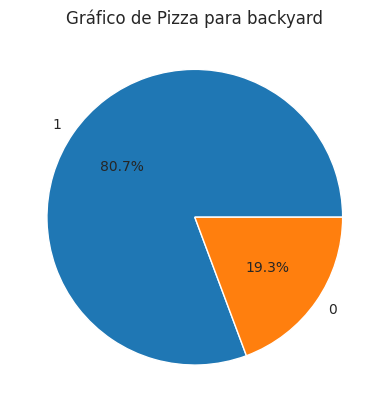

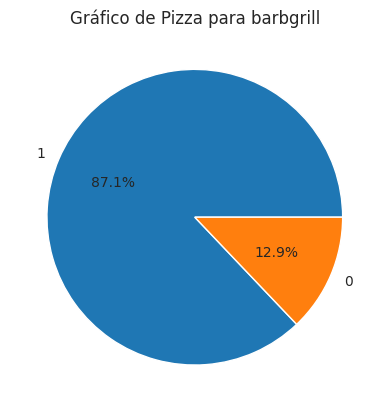

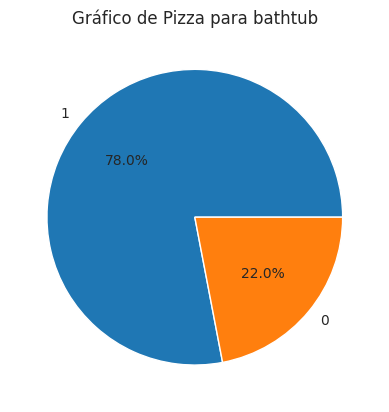

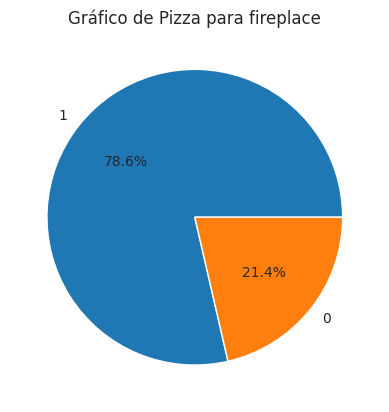

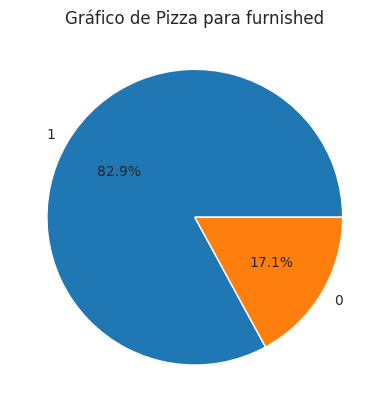

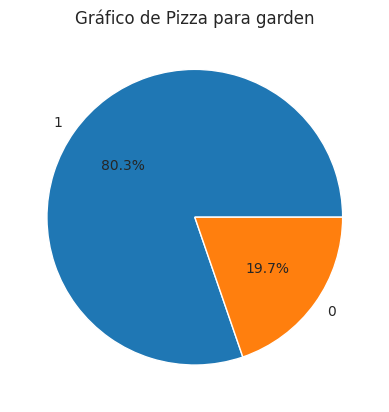

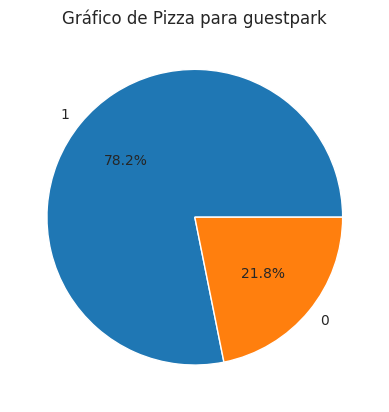

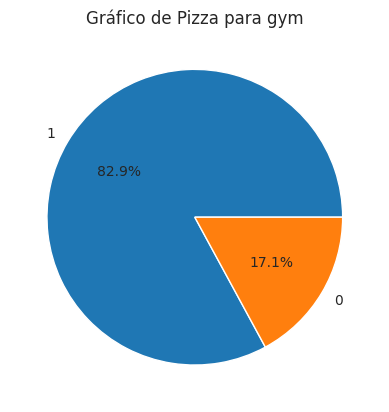

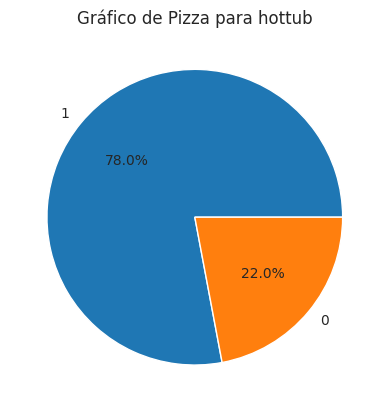

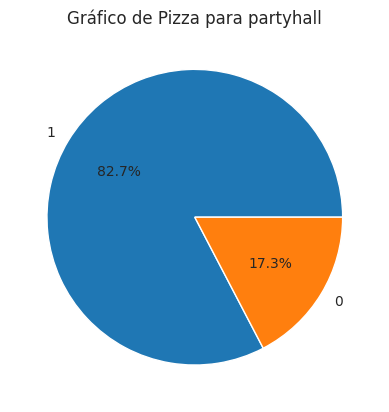

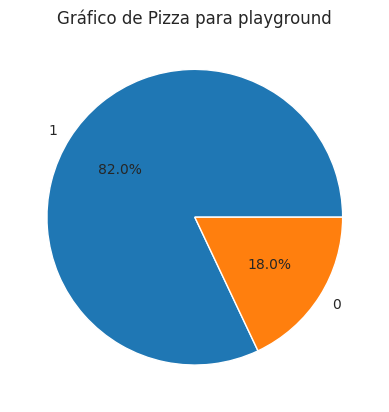

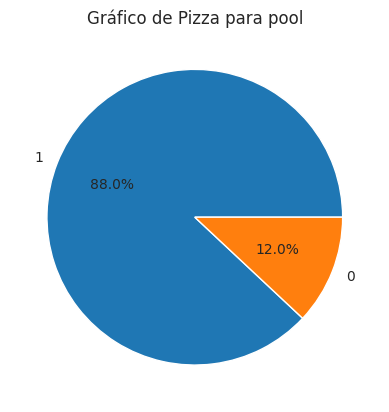

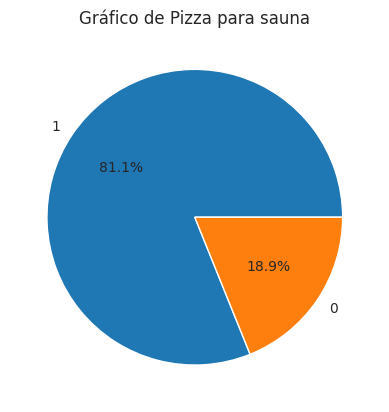

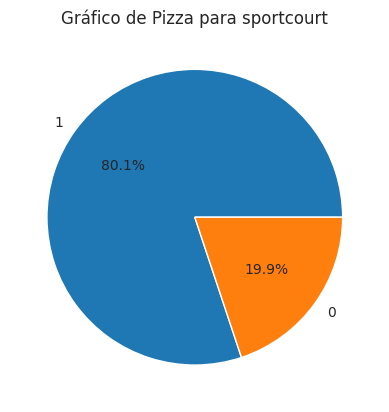

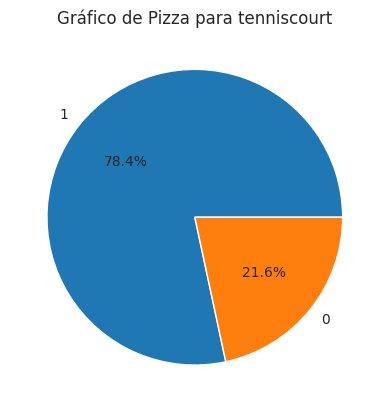

In [ ]:
for coluna in colunas_categoricas_bool:
    plt.figure()
    df_filtrado[coluna].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Gráfico de Pizza para {coluna}')
    plt.ylabel('')
    plt.show()
    #print("Coluna:", coluna, "1 = ", df_filtrado[coluna].value_counts()[1]/df_filtrado.shape[0] \
    #    ,"0 = ", df_filtrado[coluna].value_counts()[0]/df_filtrado.shape[0])
    # print pode facilitar a visualização

Das variáveis analisadas, resolvi retirar as seguintes, mantendo apenas:

       backyard, garden, gym, hottub, sportcourt, tenniscourt

In [ ]:
colunas_drop = ['barbgrill', 'fireplace', 'furnished', 'partyhall', 'pool',
                "guestpark", "playground",
                "sauna", "bathtub"]

df_ = df_filtrado.drop(colunas_drop, axis = 1)
df_.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 16791
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        13611 non-null  int64 
 1   parkingSpaces    13611 non-null  int64 
 2   monthlyCondoFee  13611 non-null  int64 
 3   usableAreas      13611 non-null  int64 
 4   bedrooms         13611 non-null  int64 
 5   backyard         13611 non-null  int64 
 6   garden           13611 non-null  int64 
 7   gym              13611 non-null  int64 
 8   hottub           13611 non-null  int64 
 9   sportcourt       13611 non-null  int64 
 10  tenniscourt      13611 non-null  int64 
 11  imvl_type        13611 non-null  object
 12  address.region   13611 non-null  object
 13  salePrice        13611 non-null  object
dtypes: int64(11), object(3)
memory usage: 1.6+ MB


Entender um pouco das variáveis multicategóricas

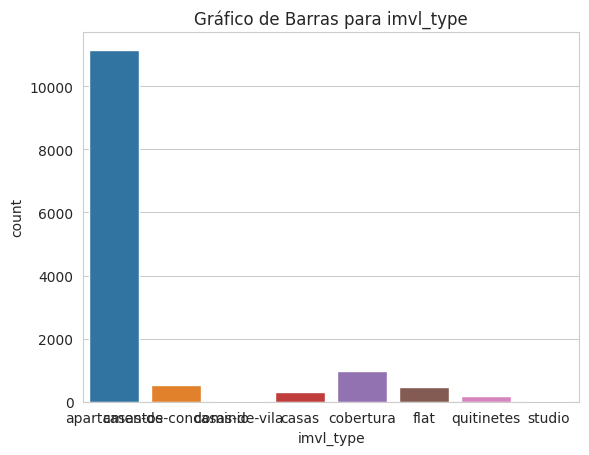

None

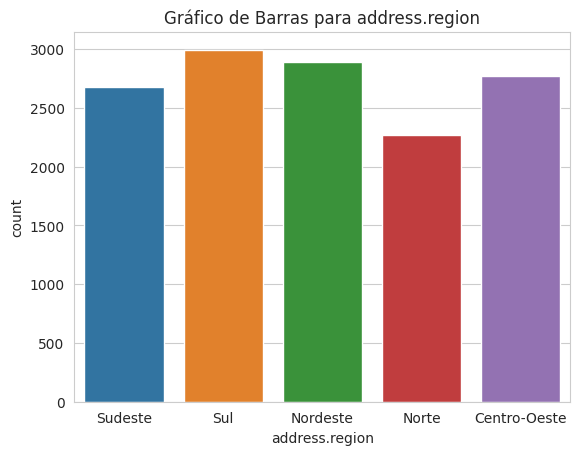

None

In [ ]:
for coluna in colunas_multcategoricas:
    plt.figure()
    sns.countplot(data=df_, x=coluna)
    plt.title(f'Gráfico de Barras para {coluna}')
    display(plt.show())


A categoria imvl_type é totalmente dominada por apartamentos, mas vou mantê-la pois o tipo de ímovel pode determinar fortemente o valor dele, principalmente quando temos coberturas, por exemplo

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 16791
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bathrooms        13611 non-null  int64 
 1   parkingSpaces    13611 non-null  int64 
 2   monthlyCondoFee  13611 non-null  int64 
 3   usableAreas      13611 non-null  int64 
 4   bedrooms         13611 non-null  int64 
 5   backyard         13611 non-null  int64 
 6   garden           13611 non-null  int64 
 7   gym              13611 non-null  int64 
 8   hottub           13611 non-null  int64 
 9   sportcourt       13611 non-null  int64 
 10  tenniscourt      13611 non-null  int64 
 11  imvl_type        13611 non-null  object
 12  address.region   13611 non-null  object
 13  salePrice        13611 non-null  object
dtypes: int64(11), object(3)
memory usage: 1.6+ MB


## Preparação dos Dados para o Modelo

Aqui vou, além de separar em treino e teste aplicar o StandardScaler, um OneHotEncoder para as multicategóricas e um label encoder para o target.


In [ ]:
X = df_.drop("salePrice", axis = 1)
y = df_["salePrice"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_treino.shape[0], X_teste.shape[0])

9527 4084


In [ ]:
scaler = StandardScaler()
X_treino[colunas_numericas] = scaler.fit_transform(X_treino[colunas_numericas])

X_teste[colunas_numericas] = scaler.transform(X_teste[colunas_numericas])

In [ ]:
onehot =  OneHotEncoder(handle_unknown='ignore', sparse_output = False, categories = "auto", dtype='int8')

colunas_treino = pd.DataFrame(onehot.fit_transform(X_treino[colunas_multcategoricas]))
#colunas_validacao = pd.DataFrame(onehot.transform(X_validacao[colunas_multcategoricas]))
colunas_teste = pd.DataFrame(onehot.transform(X_teste[colunas_multcategoricas]))

columns = onehot.get_feature_names_out(colunas_multcategoricas)

colunas_treino.columns = columns
colunas_treino.index = X_treino.index

#colunas_validacao.columns = columns
#colunas_validacao.index = X_validacao.index

colunas_teste.columns = columns
colunas_teste.index = X_teste.index

X_treino_ = X_treino.drop(colunas_multcategoricas, axis=1)
#X_validacao_ = X_validacao.drop(colunas_multcategoricas, axis=1)
X_teste_ = X_teste.drop(colunas_multcategoricas, axis=1)

X_treino_ = pd.concat([X_treino_, colunas_treino], axis=1)
#X_validacao_ = pd.concat([X_validacao_, colunas_validacao], axis=1)
X_teste_ = pd.concat([X_teste_, colunas_teste], axis = 1)

In [ ]:
lb = LabelEncoder()

y_treino_ = pd.DataFrame(lb.fit_transform(y_treino))
#y_validacao_ =  pd.DataFrame(lb.transform(y_validacao))
y_teste_ =  pd.DataFrame(lb.transform(y_teste))

## Treino do Modelo

- A partir daqui treinei um GridSearch para Árvore de Decisão e um treino comum para regressão logística.

In [ ]:
tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10, 12, 16],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [2, 4, 8, 12],  # Número mínimo de amostras necessárias para ser uma folha
    'criterion': ['gini', 'entropy'] # Critério de separação
}

grid_search = GridSearchCV(tree, param_grid, cv=5)

y_treino__ = y_treino_.values.ravel()
y_teste__ = y_teste_.values.ravel()

grid_search.fit(X_treino_, y_treino__)

best_model = grid_search.best_estimator_

pred = best_model.predict(X_teste_)
print(accuracy_score(y_teste__, pred, normalize = True))

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

0.7857492654260528
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


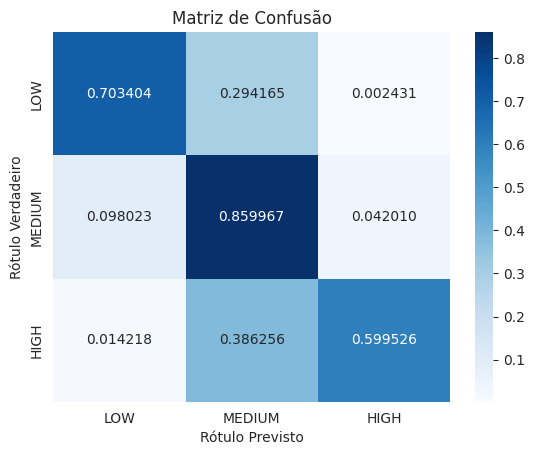

In [ ]:
pred_inverse = lb.inverse_transform(pred)
y_teste_inverse = lb.inverse_transform(y_teste__)

cm = confusion_matrix(y_teste_inverse, pred_inverse, normalize = 'true', labels = ['LOW', 'MEDIUM', 'HIGH'])
classes = ['LOW', 'MEDIUM', 'HIGH']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar os rótulos dos eixos e o título

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

In [ ]:
lr = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300)

y_treino__ = y_treino_.values.ravel()
lr.fit(X_treino_, y_treino__)

y_teste__ = y_teste_.values.ravel()

pred = lr.predict(X_teste_)
print(accuracy_score(y_teste__, pred, normalize = True))

0.7698334965719883


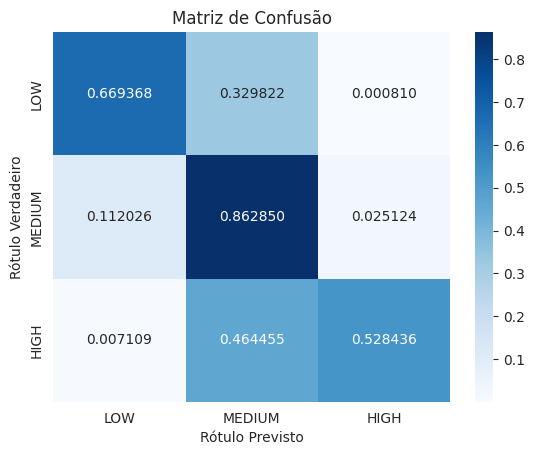

In [ ]:
pred_inverse = lb.inverse_transform(pred)
y_teste_inverse = lb.inverse_transform(y_teste__)

cm = confusion_matrix(y_teste_inverse, pred_inverse, normalize = 'true', labels = ['LOW', 'MEDIUM', 'HIGH'])
classes = ['LOW', 'MEDIUM', 'HIGH']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

# Conclusão

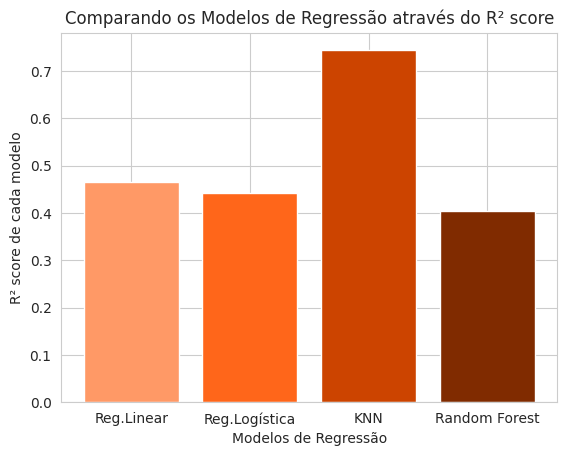

In [ ]:
# Compare Algoritmos
list_r2 = [0.4646417153409903, 0.4425649224075715, 0.7440, 0.4046]

list_mse = [22706136638.167652, 341788496448.7372, 52308.70, 25254194196.9562]

fig, ax = plt.subplots()

ax.bar(x=['Reg.Linear', 'Reg.Logística', 'KNN', 'Random Forest'], height=list_r2, color=['#ff9966', '#ff661a', '#cc4400', '#802b00'])

ax.set_title('Comparando os Modelos de Regressão através do R² score')
ax.set_ylabel('R² score de cada modelo')
ax.set_xlabel('Modelos de Regressão')

plt.show()

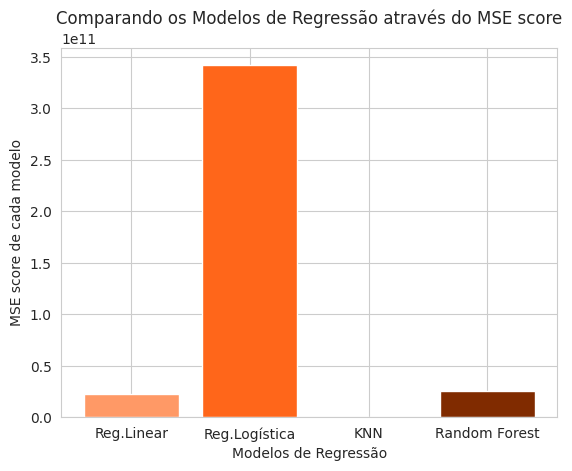

In [ ]:
fig, ax = plt.subplots()

ax.bar(x=['Reg.Linear', 'Reg.Logística', 'KNN', 'Random Forest'],
       height=list_mse, color=['#ff9966', '#ff661a', '#cc4400', '#802b00'])

ax.set_title('Comparando os Modelos de Regressão através do MSE score')
ax.set_ylabel('MSE score de cada modelo')
ax.set_xlabel('Modelos de Regressão')

plt.show()

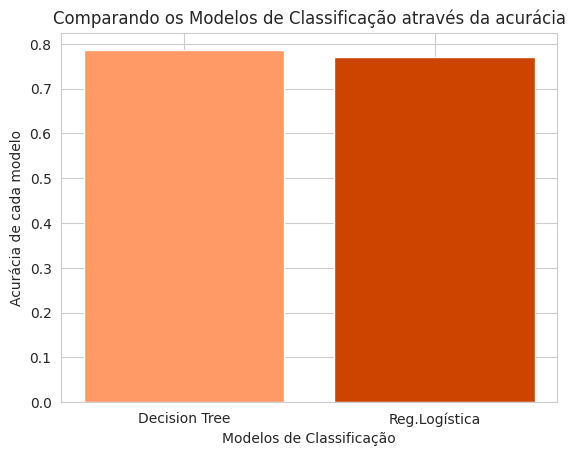

In [ ]:
class_reg = [0.7857492654260528, 0.7698334965719883]

fig, ax = plt.subplots()

ax.bar(x=['Decision Tree', 'Reg.Logística'],
       height=class_reg, color=['#ff9966', '#cc4400'])

ax.set_title('Comparando os Modelos de Classificação através da acurácia')
ax.set_ylabel('Acurácia de cada modelo')
ax.set_xlabel('Modelos de Classificação')

plt.show()